## K-means clustering

Our second assignment in our Learning Machines class is to implement k-means clustering in Python. I've implemented this in other programming languages but not in Python. Normally I'd use scikit-learn for this but it is a worthwhile exercise to think through how to do this in Python.

<!-- TEASER_END -->

Python's numpy library is instrumental for this assignment.

In [1]:
import numpy as np

The k-means function is below. The core part of the algorithm can be done in two lines with clever use of broadcasting and the `argmin` function.

In [2]:
def kmeans(data, k=3, normalize=False, limit=500):
    """Basic k-means clustering algorithm.
    """
    # optionally normalize the data. k-means will perform poorly or strangely if the dimensions
    # don't have the same ranges.
    if normalize:
        stats = (data.mean(axis=0), data.std(axis=0))
        data = (data - stats[0]) / stats[1]
    
    # pick the first k points to be the centers. this also ensures that each group has at least
    # one point.
    centers = data[:k]

    for i in range(limit):
        # core of clustering algorithm...
        # first, use broadcasting to calculate the distance from each point to each center, then
        # classify based on the minimum distance.
        classifications = np.argmin(((data[:, :, None] - centers.T[None, :, :])**2).sum(axis=1), axis=1)
        # next, calculate the new centers for each cluster.
        new_centers = np.array([data[classifications == j, :].mean(axis=0) for j in range(k)])

        # if the centers aren't moving anymore it is time to stop.
        if (new_centers == centers).all():
            break
        else:
            centers = new_centers
    else:
        # this will not execute if the for loop exits on a break.
        raise RuntimeError(f"Clustering algorithm did not complete within {limit} iterations")
            
    # if data was normalized, the cluster group centers are no longer scaled the same way the original
    # data is scaled.
    if normalize:
        centers = centers * stats[1] + stats[0]

    print(f"Clustering completed after {i} iterations")

    return classifications, centers

I can generate random data and feed it into the function to test it out.

In [3]:
data = np.random.rand(200, 2)

classifications, centers = kmeans(data, k=5)

Clustering completed after 15 iterations


The results can be plotted in matplotlib to visualize the classifications.

Each group has its own color. The center of each group is represented as a black triangle.

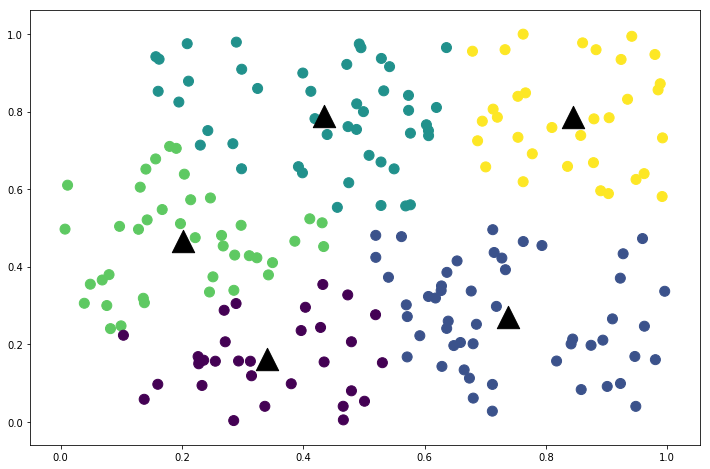

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(12, 8))
plt.scatter(x=data[:, 0], y=data[:, 1], s=100, c=classifications)
plt.scatter(x=centers[:, 0], y=centers[:, 1], s=500, c='k', marker='^');

The k-means algorithm is sensitive to the relative scale of each data's dimensions. If one dimension is more spread out it will weigh heavily on the distance function used to group data points together.

To demonstrate this, observe what happens when one dimension is scaled up by a factor of 10.

Clustering completed after 4 iterations


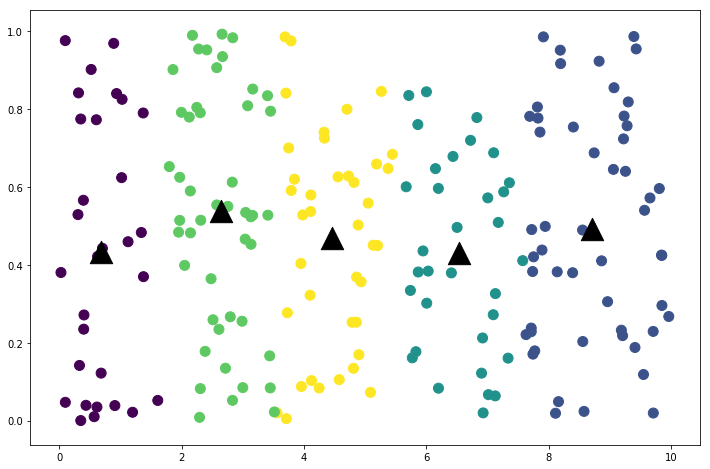

In [5]:
data = np.random.rand(200, 2)
data[:, 0] *= 10

classifications, centers = kmeans(data, k=5)

plt.figure(figsize=(12, 8))
plt.scatter(x=data[:, 0], y=data[:, 1], s=100, c=classifications)
plt.scatter(x=centers[:, 0], y=centers[:, 1], s=500, c='k', marker='^');

The algorithm groups the data into 5 vertical strips because the x axis has a greater weight than the y axis.

I get better results when I normalize the data before beginning the algorithm using the `normalize` parameter.

Clustering completed after 8 iterations


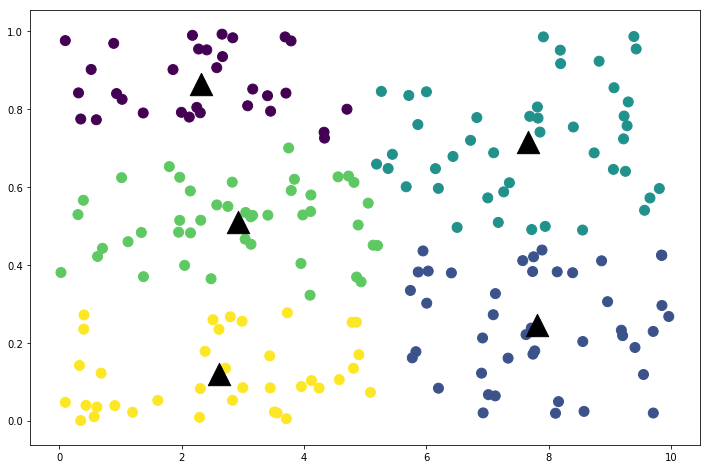

In [6]:
classifications, centers = kmeans(data, normalize=True, k=5)

plt.figure(figsize=(12, 8))
plt.scatter(x=data[:, 0], y=data[:, 1], s=100, c=classifications)
plt.scatter(x=centers[:, 0], y=centers[:, 1], s=500, c='k', marker='^');

The algorithm can cluster data with more than 2 dimensions. Below I use it to cluster data with 3 dimensions and then create a 3D plot.

Clustering completed after 9 iterations


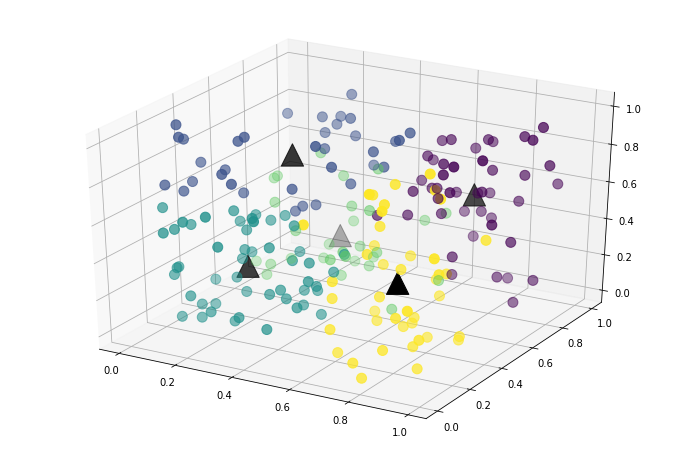

In [7]:
data = np.random.rand(200, 3)

classifications, centers = kmeans(data, normalize=True, k=5)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=classifications, s=100)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], s=500, c='k', marker='^');

## Vectors and Matrices in Python and NumPy

I've used numpy's arrays to do linear algebra quite a bit in the past, but I know there's a lot more to numpy than arrays. Numpy also has a matrix data structure that I tend not to use. I thought it would be worthwhile to compare/contrast these data structures but after some investigation I discovered that the matrix data structure will soon be depricated. Therefore, it isn't worth learning about. Nevertheless, it is interesting to learn why they will be depricated. I explain below.

First, create two arrays and two matrices.

In [8]:
a = np.arange(9).reshape(3, 3)
b = np.arange(9).reshape(3, 3).T

A = np.matrix(a)
B = np.matrix(b)

The `*` operator behaves differently for arrays and matrices. Multiplication of arrays is done element-wise but the matrices are multiplied like matrices.

In [9]:
a * b

array([[ 0,  3, 12],
       [ 3, 16, 35],
       [12, 35, 64]])

In [10]:
A * B

matrix([[  5,  14,  23],
        [ 14,  50,  86],
        [ 23,  86, 149]])

I need to use `matmul` to multiply arrays like matrices.

In [11]:
np.matmul(a, b)

array([[  5,  14,  23],
       [ 14,  50,  86],
       [ 23,  86, 149]])

I need to use `multiply` to multiply matrices element-wise.

In [12]:
np.multiply(A, B)

matrix([[ 0,  3, 12],
        [ 3, 16, 35],
        [12, 35, 64]])

The complexity from the two meanings of multiplication and the various multiplication functions is a source of confusion and programming errors. To address this, the `@` operator was added to Python 3.5 in [PEP 465](https://www.python.org/dev/peps/pep-0465/). It is because of this operator that the matrix data structure is no longer needed.

Since I am using Python 3.6, I can try it out:

In [13]:
a @ b

array([[  5,  14,  23],
       [ 14,  50,  86],
       [ 23,  86, 149]])

Simple! Now it is easier to remember: the `*` operator is for element-wise multiplication and `@` is for matrix multiplication. I only need numpy arrays.

Interestingly, the `@` operator doesn't seem to work for primitive Python datatypes. It was added to the language to benefit numpy and other mathematical libraries.

In [14]:
a.tolist() @ b.tolist()

TypeError: unsupported operand type(s) for @: 'list' and 'list'

It works just fine if one of the operands is a numpy array.

In [ ]:
a @ b.tolist()

In [ ]:
b.tolist() @ a

Conveniently the `@` operator works seemlessly with vectors.

In [ ]:
v = np.arange(3)

v @ a

In [ ]:
a @ v

Inverting matrices and solving systems of linear equations are both very important and can be done in numpy using the linear algebra tools.

In [ ]:
A = np.random.rand(3, 3)
b = np.random.rand(3)

Ainv = np.linalg.inv(A)

Multiplying `A` by its inverse gives the identity matrix, albeit with small numerical errors.

In [ ]:
A @ Ainv

I can use this to solve the equation `Ax=b`:

In [ ]:
x = Ainv @ b

x

Or I can use the `solve` function:

In [ ]:
np.linalg.solve(A, b)

Both correctly solve the equation, again with small numerical errors.

In [ ]:
A @ x - b